In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Unnamed: 0,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,1,0,0,0,0,0,0,0,1
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,1,0,0,0,0,2
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,1,0,0,3
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,1,4


In [3]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [5]:
pooly1 = PolynomialFeatures(degree = 3)
xpooly=pooly1.fit_transform(X_train)
rid1 = Ridge(alpha=1)
rid1.fit(xpooly,y_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=1)

In [6]:
pooly1_pred = rid1.predict(pooly1.fit_transform(X_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=pooly1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,9316.940597
54,31100.000000,9271.801290
185,13300.000000,9271.300899
80,20000.000000,9504.465306
33,600.000000,9271.416592
201,7400.000000,9348.968910
37,1400.000000,9270.587969
218,4800.000000,9295.523354
199,1000.000000,9271.296800
66,22000.000000,9270.585344


In [7]:
print('polynomial regresssion Performance with Ridge:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, pooly1_pred))
print('MSE:', metrics.mean_squared_error(y_test, pooly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pooly1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, pooly1_pred))

polynomial regresssion Performance with Ridge:

all features, No scaling:
MAE: 9618.302306767004
MSE: 325989752.42333364
RMSE: 18055.18630264816
R2_Score:  -2.9932618117606404


In [8]:
importance = rid1.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: -0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: -0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: -0.00000
Feature: 24, Score: -0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: -0.00000
Feature: 31, Score: -0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: -0.00000
Feature: 3

Feature: 907, Score: 0.00000
Feature: 908, Score: 0.00000
Feature: 909, Score: 0.00000
Feature: 910, Score: 0.00000
Feature: 911, Score: 0.00000
Feature: 912, Score: 0.00000
Feature: 913, Score: 0.00000
Feature: 914, Score: 0.00000
Feature: 915, Score: 0.00000
Feature: 916, Score: -0.00000
Feature: 917, Score: 0.00000
Feature: 918, Score: 0.00000
Feature: 919, Score: 0.00000
Feature: 920, Score: 0.00000
Feature: 921, Score: 0.00000
Feature: 922, Score: 0.00000
Feature: 923, Score: 0.00000
Feature: 924, Score: -0.00000
Feature: 925, Score: 0.00000
Feature: 926, Score: 0.00000
Feature: 927, Score: 0.00000
Feature: 928, Score: 0.00000
Feature: 929, Score: 0.00000
Feature: 930, Score: 0.00000
Feature: 931, Score: 0.00000
Feature: 932, Score: 0.00000
Feature: 933, Score: -0.00000
Feature: 934, Score: 0.00000
Feature: 935, Score: 0.00000
Feature: 936, Score: 0.00000
Feature: 937, Score: 0.00000
Feature: 938, Score: 0.00000
Feature: 939, Score: -0.00000
Feature: 940, Score: -0.00000
Feature: 

Feature: 1906, Score: 0.00000
Feature: 1907, Score: -0.00000
Feature: 1908, Score: -0.00000
Feature: 1909, Score: 0.00000
Feature: 1910, Score: 0.00000
Feature: 1911, Score: -0.00000
Feature: 1912, Score: -0.00000
Feature: 1913, Score: -0.00000
Feature: 1914, Score: 0.00000
Feature: 1915, Score: -0.00000
Feature: 1916, Score: -0.00000
Feature: 1917, Score: 0.00000
Feature: 1918, Score: -0.00000
Feature: 1919, Score: -0.00000
Feature: 1920, Score: -0.00000
Feature: 1921, Score: -0.00000
Feature: 1922, Score: 0.00000
Feature: 1923, Score: 0.00000
Feature: 1924, Score: -0.00000
Feature: 1925, Score: -0.00000
Feature: 1926, Score: -0.00000
Feature: 1927, Score: 0.00000
Feature: 1928, Score: 0.00000
Feature: 1929, Score: -0.00000
Feature: 1930, Score: -0.00000
Feature: 1931, Score: 0.00000
Feature: 1932, Score: 0.00000
Feature: 1933, Score: -0.00000
Feature: 1934, Score: -0.00000
Feature: 1935, Score: -0.00000
Feature: 1936, Score: 0.00000
Feature: 1937, Score: -0.00000
Feature: 1938, Score

Feature: 2906, Score: 0.00000
Feature: 2907, Score: 0.00000
Feature: 2908, Score: -0.00000
Feature: 2909, Score: -0.00000
Feature: 2910, Score: -0.00000
Feature: 2911, Score: -0.00000
Feature: 2912, Score: 0.00000
Feature: 2913, Score: -0.00000
Feature: 2914, Score: -0.00000
Feature: 2915, Score: 0.00000
Feature: 2916, Score: -0.00000
Feature: 2917, Score: -0.00000
Feature: 2918, Score: -0.00000
Feature: 2919, Score: -0.00000
Feature: 2920, Score: 0.00000
Feature: 2921, Score: 0.00000
Feature: 2922, Score: -0.00000
Feature: 2923, Score: 0.00000
Feature: 2924, Score: -0.00000
Feature: 2925, Score: 0.00000
Feature: 2926, Score: 0.00000
Feature: 2927, Score: 0.00000
Feature: 2928, Score: 0.00000
Feature: 2929, Score: 0.00000
Feature: 2930, Score: 0.00000
Feature: 2931, Score: 0.00000
Feature: 2932, Score: 0.00000
Feature: 2933, Score: 0.00000
Feature: 2934, Score: 0.00000
Feature: 2935, Score: -0.00000
Feature: 2936, Score: 0.00000
Feature: 2937, Score: -0.00000
Feature: 2938, Score: -0.0

Feature: 3758, Score: 0.00000
Feature: 3759, Score: 0.00000
Feature: 3760, Score: -0.00000
Feature: 3761, Score: 0.00000
Feature: 3762, Score: 0.00000
Feature: 3763, Score: 0.00000
Feature: 3764, Score: 0.00000
Feature: 3765, Score: 0.00000
Feature: 3766, Score: 0.00000
Feature: 3767, Score: 0.00000
Feature: 3768, Score: 0.00000
Feature: 3769, Score: -0.00000
Feature: 3770, Score: 0.00000
Feature: 3771, Score: -0.00000
Feature: 3772, Score: -0.00000
Feature: 3773, Score: -0.00000
Feature: 3774, Score: -0.00000
Feature: 3775, Score: 0.00000
Feature: 3776, Score: 0.00000
Feature: 3777, Score: -0.00000
Feature: 3778, Score: 0.00000
Feature: 3779, Score: -0.00000
Feature: 3780, Score: 0.00000
Feature: 3781, Score: 0.00000
Feature: 3782, Score: 0.00000
Feature: 3783, Score: 0.00000
Feature: 3784, Score: 0.00000
Feature: 3785, Score: -0.00000
Feature: 3786, Score: 0.00000
Feature: 3787, Score: -0.00000
Feature: 3788, Score: -0.00000
Feature: 3789, Score: -0.00000
Feature: 3790, Score: -0.000

Feature: 4569, Score: 0.00000
Feature: 4570, Score: 0.00000
Feature: 4571, Score: 0.00000
Feature: 4572, Score: 0.00000
Feature: 4573, Score: 0.00000
Feature: 4574, Score: -0.00000
Feature: 4575, Score: 0.00000
Feature: 4576, Score: 0.00000
Feature: 4577, Score: 0.00000
Feature: 4578, Score: 0.00000
Feature: 4579, Score: 0.00000
Feature: 4580, Score: 0.00000
Feature: 4581, Score: 0.00000
Feature: 4582, Score: 0.00000
Feature: 4583, Score: 0.00000
Feature: 4584, Score: -0.00000
Feature: 4585, Score: 0.00000
Feature: 4586, Score: 0.00000
Feature: 4587, Score: 0.00000
Feature: 4588, Score: 0.00000
Feature: 4589, Score: 0.00000
Feature: 4590, Score: 0.00000
Feature: 4591, Score: 0.00000
Feature: 4592, Score: 0.00000
Feature: 4593, Score: 0.00000
Feature: 4594, Score: 0.00000
Feature: 4595, Score: -0.00000
Feature: 4596, Score: 0.00000
Feature: 4597, Score: 0.00000
Feature: 4598, Score: 0.00000
Feature: 4599, Score: 0.00000
Feature: 4600, Score: 0.00000
Feature: 4601, Score: 0.00000
Feature

Feature: 5404, Score: 0.00000
Feature: 5405, Score: -0.00000
Feature: 5406, Score: 0.00000
Feature: 5407, Score: 0.00000
Feature: 5408, Score: 0.00000
Feature: 5409, Score: 0.00000
Feature: 5410, Score: 0.00000
Feature: 5411, Score: 0.00000
Feature: 5412, Score: 0.00000
Feature: 5413, Score: 0.00000
Feature: 5414, Score: 0.00000
Feature: 5415, Score: 0.00000
Feature: 5416, Score: 0.00000
Feature: 5417, Score: 0.00000
Feature: 5418, Score: 0.00000
Feature: 5419, Score: 0.00000
Feature: 5420, Score: -0.00000
Feature: 5421, Score: 0.00000
Feature: 5422, Score: 0.00000
Feature: 5423, Score: 0.00000
Feature: 5424, Score: 0.00000
Feature: 5425, Score: 0.00000
Feature: 5426, Score: 0.00000
Feature: 5427, Score: 0.00000
Feature: 5428, Score: 0.00000
Feature: 5429, Score: 0.00000
Feature: 5430, Score: 0.00000
Feature: 5431, Score: 0.00000
Feature: 5432, Score: 0.00000
Feature: 5433, Score: 0.00000
Feature: 5434, Score: 0.00000
Feature: 5435, Score: 0.00000
Feature: 5436, Score: 0.00000
Feature:

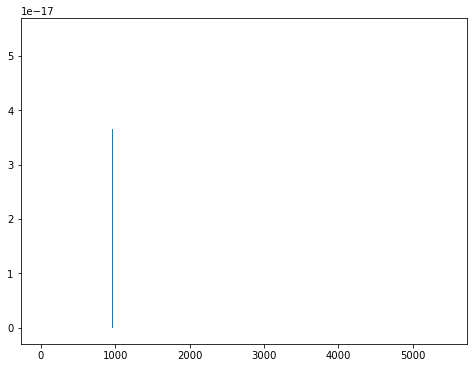

In [9]:
# plot feature importance
plt.figure(figsize=(8,6))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

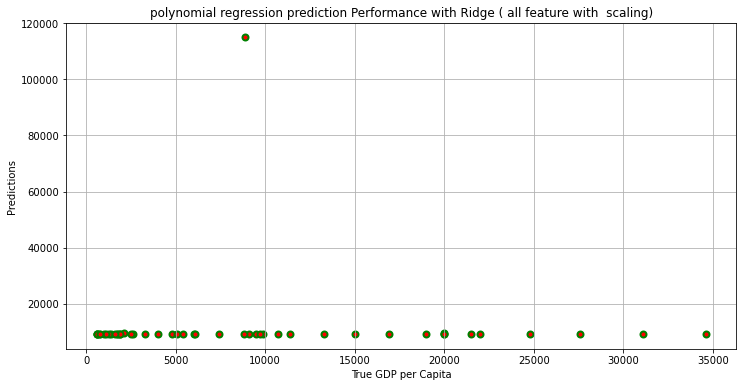

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,pooly1_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with Ridge ( all feature with  scaling)') 
plt.grid()
plt.show()

In [11]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [12]:
pooly2 = PolynomialFeatures(degree = 3)
x2pooly=pooly2.fit_transform(X2_train)
rid2 =Ridge(alpha=1)
rid2.fit(x2pooly,y2_train)

Ridge(alpha=1)

In [13]:
pooly2_pred = rid2.predict(pooly2.fit_transform(X2_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=pooly2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,4363.873729
54,31100.000000,43464.296365
185,13300.000000,9544.906820
80,20000.000000,10698.528531
33,600.000000,-848.596012
201,7400.000000,4792.136661
37,1400.000000,-2031.929722
218,4800.000000,12276.054017
199,1000.000000,1318.352230
66,22000.000000,10447.485334


In [14]:
print('polynomial regresssion Performance with Ridge:')
print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, pooly2_pred))
print('MSE:', metrics.mean_squared_error(y_test, pooly2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, pooly2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, pooly2_pred))

polynomial regresssion Performance with Ridge:

all features, with scaling:
MAE: 5503.632267427448
MSE: 69917889.86671236
RMSE: 8361.691806489423
R2_Score:  0.14353001133282206


In [15]:
importance = rid2.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 32.15086
Feature: 2, Score: 41.02383
Feature: 3, Score: 23.62067
Feature: 4, Score: 5.05026
Feature: 5, Score: -49.60765
Feature: 6, Score: 22.68903
Feature: 7, Score: -80.90641
Feature: 8, Score: 64.86050
Feature: 9, Score: 140.84845
Feature: 10, Score: -54.77526
Feature: 11, Score: 15.56928
Feature: 12, Score: 36.23632
Feature: 13, Score: 18.56649
Feature: 14, Score: -55.44549
Feature: 15, Score: -8.03016
Feature: 16, Score: -111.18022
Feature: 17, Score: 71.05778
Feature: 18, Score: 29.38951
Feature: 19, Score: 13.73933
Feature: 20, Score: 0.17615
Feature: 21, Score: -1.10447
Feature: 22, Score: 0.21669
Feature: 23, Score: -25.51937
Feature: 24, Score: 6.53272
Feature: 25, Score: 0.16574
Feature: 26, Score: 0.40605
Feature: 27, Score: 13.21939
Feature: 28, Score: -30.94567
Feature: 29, Score: 40.50109
Feature: 30, Score: 32.15086
Feature: 31, Score: 83.22312
Feature: 32, Score: 16.07106
Feature: 33, Score: 46.88124
Feature: 34, Score: -2

Feature: 964, Score: -4.28153
Feature: 965, Score: -10.89537
Feature: 966, Score: -17.14371
Feature: 967, Score: 10.74790
Feature: 968, Score: 34.86660
Feature: 969, Score: 2.17756
Feature: 970, Score: -20.83282
Feature: 971, Score: 8.77507
Feature: 972, Score: 10.60366
Feature: 973, Score: -16.02733
Feature: 974, Score: 8.39102
Feature: 975, Score: -24.67066
Feature: 976, Score: -31.13662
Feature: 977, Score: 46.39621
Feature: 978, Score: -11.87380
Feature: 979, Score: -1.07002
Feature: 980, Score: -1.84285
Feature: 981, Score: -2.37943
Feature: 982, Score: 21.33035
Feature: 983, Score: 0.20211
Feature: 984, Score: -1.48072
Feature: 985, Score: 0.84660
Feature: 986, Score: -2.18763
Feature: 987, Score: 2.77898
Feature: 988, Score: -11.95782
Feature: 989, Score: 3.00249
Feature: 990, Score: 8.47945
Feature: 991, Score: -2.04274
Feature: 992, Score: -6.92982
Feature: 993, Score: -16.11183
Feature: 994, Score: 1.28949
Feature: 995, Score: 0.79198
Feature: 996, Score: 9.98106
Feature: 997

Feature: 1257, Score: 20.38268
Feature: 1258, Score: -18.14280
Feature: 1259, Score: -10.48199
Feature: 1260, Score: 3.80939
Feature: 1261, Score: 11.07433
Feature: 1262, Score: 33.28383
Feature: 1263, Score: -38.81367
Feature: 1264, Score: 30.42503
Feature: 1265, Score: 2.07727
Feature: 1266, Score: 3.84512
Feature: 1267, Score: 5.91111
Feature: 1268, Score: -57.69867
Feature: 1269, Score: 7.33579
Feature: 1270, Score: 2.75511
Feature: 1271, Score: 2.04527
Feature: 1272, Score: 14.40251
Feature: 1273, Score: -14.93418
Feature: 1274, Score: 29.52959
Feature: 1275, Score: -4.06198
Feature: 1276, Score: 10.39757
Feature: 1277, Score: 41.07645
Feature: 1278, Score: -43.12039
Feature: 1279, Score: -58.01686
Feature: 1280, Score: 2.46706
Feature: 1281, Score: 3.52823
Feature: 1282, Score: 7.90873
Feature: 1283, Score: -3.76141
Feature: 1284, Score: 15.50234
Feature: 1285, Score: 3.13484
Feature: 1286, Score: 2.28686
Feature: 1287, Score: 13.04887
Feature: 1288, Score: 26.79404
Feature: 1289

Feature: 1887, Score: -3.78617
Feature: 1888, Score: -7.51898
Feature: 1889, Score: -27.23111
Feature: 1890, Score: 8.75954
Feature: 1891, Score: 15.65620
Feature: 1892, Score: 14.27666
Feature: 1893, Score: -1.48854
Feature: 1894, Score: -3.49488
Feature: 1895, Score: -2.09666
Feature: 1896, Score: -35.76397
Feature: 1897, Score: 9.52237
Feature: 1898, Score: -1.98477
Feature: 1899, Score: -2.60884
Feature: 1900, Score: -4.87392
Feature: 1901, Score: 3.40197
Feature: 1902, Score: 28.73563
Feature: 1903, Score: 4.42512
Feature: 1904, Score: -4.05015
Feature: 1905, Score: -5.70517
Feature: 1906, Score: 5.10988
Feature: 1907, Score: 2.73488
Feature: 1908, Score: -5.52192
Feature: 1909, Score: 20.91701
Feature: 1910, Score: 11.20524
Feature: 1911, Score: -0.39962
Feature: 1912, Score: 19.51143
Feature: 1913, Score: -14.28402
Feature: 1914, Score: -3.70279
Feature: 1915, Score: -17.29251
Feature: 1916, Score: -0.42162
Feature: 1917, Score: -0.53859
Feature: 1918, Score: -0.48033
Feature: 1

Feature: 2886, Score: 3.10487
Feature: 2887, Score: 5.44821
Feature: 2888, Score: -4.53804
Feature: 2889, Score: -8.33796
Feature: 2890, Score: 8.35332
Feature: 2891, Score: -31.31223
Feature: 2892, Score: 12.91804
Feature: 2893, Score: 25.66528
Feature: 2894, Score: 14.92231
Feature: 2895, Score: 15.37552
Feature: 2896, Score: 53.02714
Feature: 2897, Score: 17.12617
Feature: 2898, Score: 15.08217
Feature: 2899, Score: -10.86590
Feature: 2900, Score: 7.15165
Feature: 2901, Score: -78.21691
Feature: 2902, Score: 48.69309
Feature: 2903, Score: -63.35616
Feature: 2904, Score: 9.77218
Feature: 2905, Score: 0.18071
Feature: 2906, Score: -8.02592
Feature: 2907, Score: -8.23899
Feature: 2908, Score: 127.17119
Feature: 2909, Score: 87.84294
Feature: 2910, Score: 92.82909
Feature: 2911, Score: -15.69465
Feature: 2912, Score: -71.49607
Feature: 2913, Score: -16.23206
Feature: 2914, Score: 11.45607
Feature: 2915, Score: 19.07400
Feature: 2916, Score: 14.53354
Feature: 2917, Score: -126.75866
Feat

Feature: 3759, Score: -6.67387
Feature: 3760, Score: 30.59647
Feature: 3761, Score: 68.11959
Feature: 3762, Score: 30.05806
Feature: 3763, Score: -19.73136
Feature: 3764, Score: -25.79945
Feature: 3765, Score: -34.83447
Feature: 3766, Score: 89.03501
Feature: 3767, Score: -38.49995
Feature: 3768, Score: -1.09323
Feature: 3769, Score: -14.60044
Feature: 3770, Score: -26.80715
Feature: 3771, Score: -20.43295
Feature: 3772, Score: 85.41353
Feature: 3773, Score: -98.68539
Feature: 3774, Score: -19.26416
Feature: 3775, Score: -18.49503
Feature: 3776, Score: 9.84881
Feature: 3777, Score: 55.77164
Feature: 3778, Score: -50.18941
Feature: 3779, Score: 39.09363
Feature: 3780, Score: -45.96204
Feature: 3781, Score: -12.96868
Feature: 3782, Score: 2.79637
Feature: 3783, Score: 2.56319
Feature: 3784, Score: 0.14651
Feature: 3785, Score: -2.76273
Feature: 3786, Score: -4.48123
Feature: 3787, Score: -31.64802
Feature: 3788, Score: -30.20006
Feature: 3789, Score: 1.72797
Feature: 3790, Score: -2.8911

Feature: 4525, Score: -53.50314
Feature: 4526, Score: -28.69306
Feature: 4527, Score: 185.44190
Feature: 4528, Score: -93.22010
Feature: 4529, Score: -38.20854
Feature: 4530, Score: -32.28533
Feature: 4531, Score: -47.72677
Feature: 4532, Score: 8.03808
Feature: 4533, Score: -28.96980
Feature: 4534, Score: -17.37408
Feature: 4535, Score: -52.70778
Feature: 4536, Score: 71.69357
Feature: 4537, Score: 127.61176
Feature: 4538, Score: 12.18433
Feature: 4539, Score: 23.52465
Feature: 4540, Score: -11.55172
Feature: 4541, Score: -213.98457
Feature: 4542, Score: 38.64075
Feature: 4543, Score: 15.95487
Feature: 4544, Score: 17.73002
Feature: 4545, Score: 55.96292
Feature: 4546, Score: 60.51898
Feature: 4547, Score: -63.32520
Feature: 4548, Score: 55.78867
Feature: 4549, Score: -86.20518
Feature: 4550, Score: -113.19835
Feature: 4551, Score: 16.40248
Feature: 4552, Score: 28.38776
Feature: 4553, Score: 35.62616
Feature: 4554, Score: 4.00367
Feature: 4555, Score: 50.78772
Feature: 4556, Score: 2

Feature: 4941, Score: 1.64921
Feature: 4942, Score: -1.26919
Feature: 4943, Score: -2.21421
Feature: 4944, Score: -3.78363
Feature: 4945, Score: 8.05574
Feature: 4946, Score: 20.62642
Feature: 4947, Score: -3.59053
Feature: 4948, Score: -4.31542
Feature: 4949, Score: 1.28380
Feature: 4950, Score: 2.08949
Feature: 4951, Score: 2.47970
Feature: 4952, Score: -3.17847
Feature: 4953, Score: -5.41152
Feature: 4954, Score: -7.66603
Feature: 4955, Score: 20.16183
Feature: 4956, Score: 115.37177
Feature: 4957, Score: -16.43577
Feature: 4958, Score: -5.38876
Feature: 4959, Score: -1.87853
Feature: 4960, Score: -1.02414
Feature: 4961, Score: -11.41896
Feature: 4962, Score: -18.63746
Feature: 4963, Score: -16.65159
Feature: 4964, Score: 13.13201
Feature: 4965, Score: 86.78706
Feature: 4966, Score: -7.31792
Feature: 4967, Score: -1.62661
Feature: 4968, Score: -0.13206
Feature: 4969, Score: -18.82796
Feature: 4970, Score: -30.85605
Feature: 4971, Score: -29.16218
Feature: 4972, Score: -67.62261
Feat

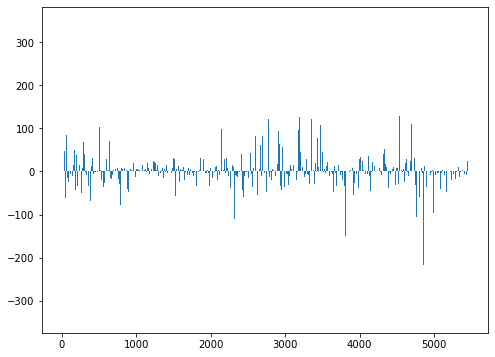

In [16]:
# plot feature importance
plt.figure(figsize=(8,6))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

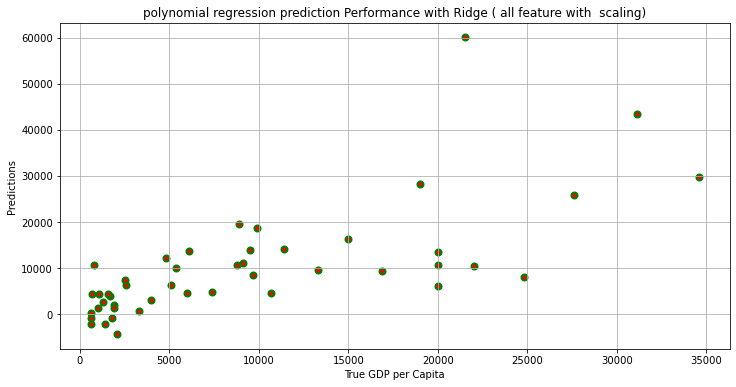

In [17]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,pooly2_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with Ridge ( all feature with  scaling)') 
plt.grid()
plt.show()

In [18]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. km.)', 'Arable (%)',
                        'Climate', 'Deathrate'], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [19]:
pooly3 = PolynomialFeatures(degree = 3)
x3pooly=pooly3.fit_transform(X3_train)
rid3 = Ridge(alpha=1)
rid3.fit(x3pooly,y3_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Ridge(alpha=1)

In [20]:
pooly3_pred = rid3.predict(pooly3.fit_transform(X3_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=pooly3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-358.529138
54,31100.000000,34964.677250
185,13300.000000,10081.998016
80,20000.000000,25800.977471
33,600.000000,6795.367052
201,7400.000000,2708.490939
37,1400.000000,1607.154173
218,4800.000000,479.295372
199,1000.000000,8444.976425
66,22000.000000,-11175.865901


In [21]:
print('polynomial regresssion Performance with Ridge:')
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, pooly3_pred))
print('MSE:', metrics.mean_squared_error(y_test, pooly3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, pooly3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, pooly3_pred))

polynomial regresssion Performance with Ridge:

selected features, No scaling:
MAE: 10724.90204376256
MSE: 375248862.50038576
RMSE: 19371.341267459662
R2_Score:  -3.596668887258411


In [22]:
importance = rid3.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00001
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00001
Feature: 8, Score: -0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: -0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: -0.00000
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.00001
Feature: 28, Score: -0.00013
Feature: 29, Score: -0.00007
Feature: 30, Score: -0.00006
Feature: 31, Score: -0.00017
Feature: 32, Score: 0.00001
Feature: 33, Score: -0.00012
Feature: 34, Score: -0.00012
Feature: 3

Feature: 977, Score: -0.00963
Feature: 978, Score: 0.01230
Feature: 979, Score: 0.01336
Feature: 980, Score: -0.00778
Feature: 981, Score: 0.01136
Feature: 982, Score: 0.01824
Feature: 983, Score: 0.00308
Feature: 984, Score: -0.00008
Feature: 985, Score: -0.00008
Feature: 986, Score: 0.00031
Feature: 987, Score: -0.00002
Feature: 988, Score: -0.00002
Feature: 989, Score: -0.00000
Feature: 990, Score: -0.00001
Feature: 991, Score: -0.00006
Feature: 992, Score: 0.00000
Feature: 993, Score: 0.00000
Feature: 994, Score: 0.00002
Feature: 995, Score: 0.00020
Feature: 996, Score: 0.00005
Feature: 997, Score: -0.00001
Feature: 998, Score: 0.00752
Feature: 999, Score: -0.00029
Feature: 1000, Score: -0.00039
Feature: 1001, Score: -0.00014
Feature: 1002, Score: -0.01966
Feature: 1003, Score: -0.00046
Feature: 1004, Score: 0.00032
Feature: 1005, Score: 0.00012
Feature: 1006, Score: 0.00000
Feature: 1007, Score: 0.00000
Feature: 1008, Score: -0.00001
Feature: 1009, Score: 0.00000
Feature: 1010, Sc

Feature: 1865, Score: 0.00002
Feature: 1866, Score: 0.00003
Feature: 1867, Score: 0.00308
Feature: 1868, Score: -0.00004
Feature: 1869, Score: 0.00000
Feature: 1870, Score: 0.00000
Feature: 1871, Score: 0.00000
Feature: 1872, Score: 0.00000
Feature: 1873, Score: 0.00000
Feature: 1874, Score: 0.00000
Feature: 1875, Score: 0.00000
Feature: 1876, Score: 0.00000
Feature: 1877, Score: 0.00000
Feature: 1878, Score: 0.00000
Feature: 1879, Score: -0.00365
Feature: 1880, Score: -0.00001
Feature: 1881, Score: 0.00000
Feature: 1882, Score: 0.00000
Feature: 1883, Score: 0.00000
Feature: 1884, Score: 0.00000
Feature: 1885, Score: 0.00000
Feature: 1886, Score: 0.00000
Feature: 1887, Score: 0.00000
Feature: 1888, Score: 0.00000
Feature: 1889, Score: 0.00000
Feature: 1890, Score: -0.00033
Feature: 1891, Score: -0.00001
Feature: 1892, Score: 0.00000
Feature: 1893, Score: 0.00000
Feature: 1894, Score: 0.00000
Feature: 1895, Score: 0.00000
Feature: 1896, Score: 0.00000
Feature: 1897, Score: 0.00000
Featu

Feature: 2649, Score: -0.00002
Feature: 2650, Score: -0.00000
Feature: 2651, Score: 0.00000
Feature: 2652, Score: 0.00000
Feature: 2653, Score: 0.00000
Feature: 2654, Score: 0.00000
Feature: 2655, Score: 0.00000
Feature: 2656, Score: 0.00000
Feature: 2657, Score: 0.00000
Feature: 2658, Score: 0.00000
Feature: 2659, Score: 0.00000
Feature: 2660, Score: 0.00000
Feature: 2661, Score: -0.00000
Feature: 2662, Score: 0.00000
Feature: 2663, Score: 0.00000
Feature: 2664, Score: 0.00000
Feature: 2665, Score: 0.00000
Feature: 2666, Score: 0.00000
Feature: 2667, Score: 0.00000
Feature: 2668, Score: 0.00000
Feature: 2669, Score: 0.00000
Feature: 2670, Score: 0.00000
Feature: 2671, Score: 0.00000
Feature: 2672, Score: 0.00000
Feature: 2673, Score: 0.00000
Feature: 2674, Score: 0.00000
Feature: 2675, Score: 0.00000
Feature: 2676, Score: 0.00000
Feature: 2677, Score: 0.00000
Feature: 2678, Score: 0.00000
Feature: 2679, Score: -0.00000
Feature: 2680, Score: -0.00000
Feature: 2681, Score: 0.00000
Featu

Feature: 3275, Score: -0.00105


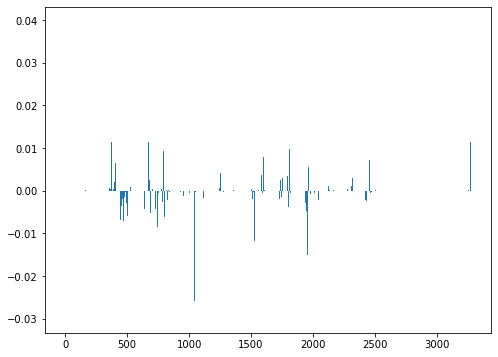

In [23]:
# plot feature importance
plt.figure(figsize=(8,6))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

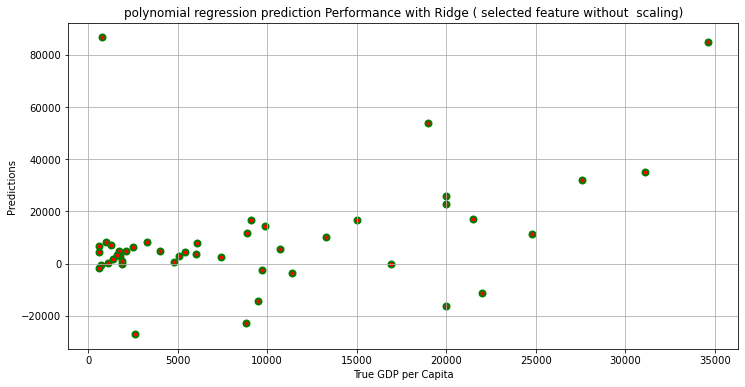

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,pooly3_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with Ridge ( selected feature without  scaling)') 
plt.grid()
plt.show()

In [25]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [26]:
pooly4 = PolynomialFeatures(degree = 3)
x4pooly=pooly4.fit_transform(X4_train)
rid4 = Ridge(alpha=1)
rid4.fit(x4pooly,y4_train)

Ridge(alpha=1)

In [27]:
pooly4_pred = rid4.predict(pooly4.fit_transform(X4_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=pooly4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,5330.774423
54,31100.000000,31800.297582
185,13300.000000,12911.463409
80,20000.000000,-5948.636877
33,600.000000,11951.643102
201,7400.000000,2765.775481
37,1400.000000,-6431.165284
218,4800.000000,11675.133713
199,1000.000000,-870.778598
66,22000.000000,8674.440037


In [28]:
print('polynomial regresssion Performance with Ridge:')
print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, pooly4_pred))
print('MSE:', metrics.mean_squared_error(y_test, pooly4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, pooly4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, pooly4_pred))

polynomial regresssion Performance with Ridge:

selected features, with scaling:
MAE: 8282.97242953723
MSE: 312059375.4285658
RMSE: 17665.20238855377
R2_Score:  -2.8226195076295686


In [29]:
importance = rid4.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00000
Feature: 1, Score: 37.91700
Feature: 2, Score: 37.76435
Feature: 3, Score: -85.33403
Feature: 4, Score: -74.40060
Feature: 5, Score: -78.11886
Feature: 6, Score: 137.84818
Feature: 7, Score: 197.00032
Feature: 8, Score: -15.26691
Feature: 9, Score: 165.76260
Feature: 10, Score: 5.35983
Feature: 11, Score: -165.42088
Feature: 12, Score: 48.24151
Feature: 13, Score: 126.49518
Feature: 14, Score: 19.43401
Feature: 15, Score: 0.15261
Feature: 16, Score: -0.98739
Feature: 17, Score: -0.21294
Feature: 18, Score: -33.27327
Feature: 19, Score: 2.05649
Feature: 20, Score: 0.50341
Feature: 21, Score: -0.23679
Feature: 22, Score: 21.48568
Feature: 23, Score: -16.87866
Feature: 24, Score: 21.65385
Feature: 25, Score: 37.91700
Feature: 26, Score: 139.60677
Feature: 27, Score: -16.33375
Feature: 28, Score: -21.27815
Feature: 29, Score: 84.44343
Feature: 30, Score: 86.13099
Feature: 31, Score: -1.52238
Feature: 32, Score: 7.42248
Feature: 33, Score: -36.33982
Feature: 34, S

Feature: 912, Score: 0.88093
Feature: 913, Score: -9.86300
Feature: 914, Score: 4.44894
Feature: 915, Score: 0.83884
Feature: 916, Score: 0.24096
Feature: 917, Score: 2.61561
Feature: 918, Score: 3.38362
Feature: 919, Score: -8.36363
Feature: 920, Score: 2.55953
Feature: 921, Score: 0.53677
Feature: 922, Score: 1.62822
Feature: 923, Score: -17.22470
Feature: 924, Score: 7.92651
Feature: 925, Score: 1.53102
Feature: 926, Score: 0.47184
Feature: 927, Score: 4.71318
Feature: 928, Score: 6.12940
Feature: 929, Score: -14.62593
Feature: 930, Score: 2.59035
Feature: 931, Score: 11.48122
Feature: 932, Score: -19.55537
Feature: 933, Score: 7.61498
Feature: 934, Score: 1.15522
Feature: 935, Score: 0.08557
Feature: 936, Score: 4.06913
Feature: 937, Score: 5.01567
Feature: 938, Score: -16.43097
Feature: 939, Score: 3.29100
Feature: 940, Score: 155.84397
Feature: 941, Score: -9.53758
Feature: 942, Score: -12.78194
Feature: 943, Score: -13.31301
Feature: 944, Score: -21.57330
Feature: 945, Score: -3

Feature: 1907, Score: 18.10767
Feature: 1908, Score: -57.24483
Feature: 1909, Score: 42.78291
Feature: 1910, Score: 240.49287
Feature: 1911, Score: -21.74588
Feature: 1912, Score: -12.82165
Feature: 1913, Score: -9.42689
Feature: 1914, Score: -20.67816
Feature: 1915, Score: -27.20805
Feature: 1916, Score: -158.16718
Feature: 1917, Score: -100.71740
Feature: 1918, Score: 33.41136
Feature: 1919, Score: 4.35290
Feature: 1920, Score: 5.02358
Feature: 1921, Score: 11.19595
Feature: 1922, Score: 21.31665
Feature: 1923, Score: -65.52693
Feature: 1924, Score: -17.23889
Feature: 1925, Score: 23.69430
Feature: 1926, Score: 3.15270
Feature: 1927, Score: 7.02440
Feature: 1928, Score: 13.30171
Feature: 1929, Score: -39.44855
Feature: 1930, Score: 3.57201
Feature: 1931, Score: -3.66233
Feature: 1932, Score: 7.62837
Feature: 1933, Score: 14.04890
Feature: 1934, Score: -33.73807
Feature: 1935, Score: -1.62566
Feature: 1936, Score: 8.17712
Feature: 1937, Score: 31.23017
Feature: 1938, Score: -74.46403


Feature: 2653, Score: 5.33906
Feature: 2654, Score: 2.24751
Feature: 2655, Score: -3.29127
Feature: 2656, Score: -1.75580
Feature: 2657, Score: 0.12268
Feature: 2658, Score: -1.36501
Feature: 2659, Score: -6.15068
Feature: 2660, Score: 16.46622
Feature: 2661, Score: -53.82201
Feature: 2662, Score: 3.36450
Feature: 2663, Score: 14.84606
Feature: 2664, Score: 7.05005
Feature: 2665, Score: -3.92699
Feature: 2666, Score: -1.42389
Feature: 2667, Score: 3.90742
Feature: 2668, Score: 3.51118
Feature: 2669, Score: -6.92250
Feature: 2670, Score: 27.67182
Feature: 2671, Score: -177.81326
Feature: 2672, Score: 31.19636
Feature: 2673, Score: 16.26023
Feature: 2674, Score: 1.18487
Feature: 2675, Score: 3.25420
Feature: 2676, Score: 14.65188
Feature: 2677, Score: 20.57503
Feature: 2678, Score: 3.84059
Feature: 2679, Score: -66.01405
Feature: 2680, Score: -229.96438
Feature: 2681, Score: 42.69168
Feature: 2682, Score: 8.31876
Feature: 2683, Score: 11.86854
Feature: 2684, Score: 41.33660
Feature: 2685

Feature: 3025, Score: -3.33380
Feature: 3026, Score: -0.11974
Feature: 3027, Score: -5.40191
Feature: 3028, Score: -0.87368
Feature: 3029, Score: 0.07033
Feature: 3030, Score: 0.03797
Feature: 3031, Score: 0.87875
Feature: 3032, Score: -0.44473
Feature: 3033, Score: 0.89105
Feature: 3034, Score: 5.10143
Feature: 3035, Score: -0.37239
Feature: 3036, Score: 0.00851
Feature: 3037, Score: 0.50041
Feature: 3038, Score: -0.32082
Feature: 3039, Score: 0.50592
Feature: 3040, Score: 0.77554
Feature: 3041, Score: 0.20331
Feature: 3042, Score: 0.41673
Feature: 3043, Score: -0.33356
Feature: 3044, Score: 0.41985
Feature: 3045, Score: 1.10035
Feature: 3046, Score: -7.45000
Feature: 3047, Score: 0.78451
Feature: 3048, Score: 1.93516
Feature: 3049, Score: 3.63956
Feature: 3050, Score: 2.99023
Feature: 3051, Score: 0.75363
Feature: 3052, Score: -6.02612
Feature: 3053, Score: -6.96621
Feature: 3054, Score: 7.87390
Feature: 3055, Score: -16.58864
Feature: 3056, Score: -17.93431
Feature: 3057, Score: 0.9

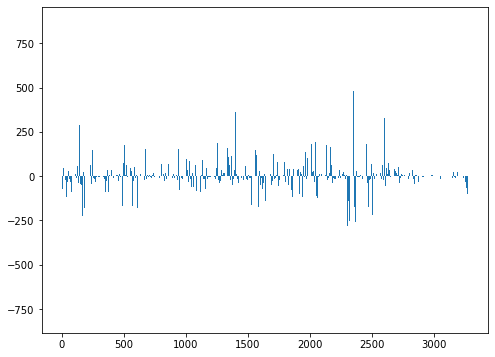

In [30]:
# plot feature importance
plt.figure(figsize=(8,6))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

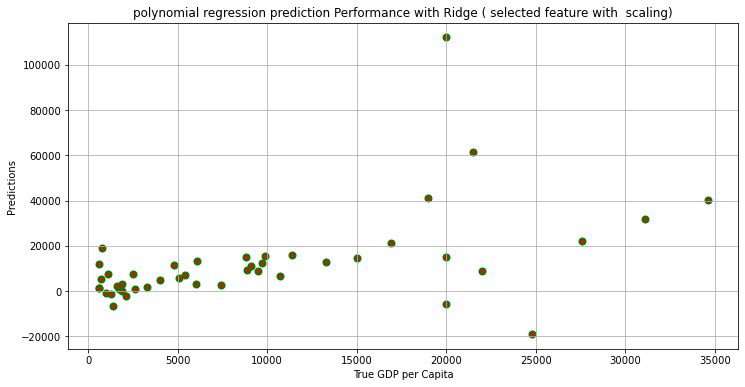

In [31]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,pooly4_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with Ridge ( selected feature with  scaling)') 
plt.grid()
plt.show()